## 01. Import data and libraries 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path to data

path = r'/Users/louise/Desktop/CF Coursework/Achievement 4 /Instacart Basket Analysis'

In [3]:
# Import combined data

df_complete = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers.pkl'))

In [22]:
# Check output

df_complete.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,num_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## 02. Practice making bar, histogram, scatter, and line charts 

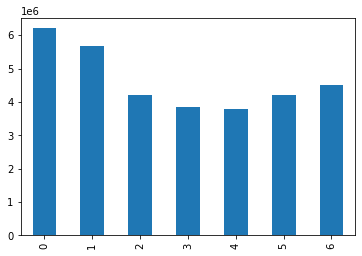

In [45]:
# Create bar chart of orders by day of the week (0 = Sunday, 1 = Monday, etc.)

bar = df_complete['order_day_of_week'].value_counts().sort_index().plot.bar()

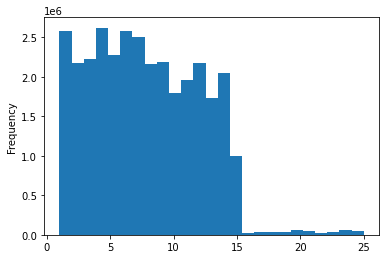

In [46]:
# Create a histogram of order prices

hist = df_complete['prices'].plot.hist(bins = 25)

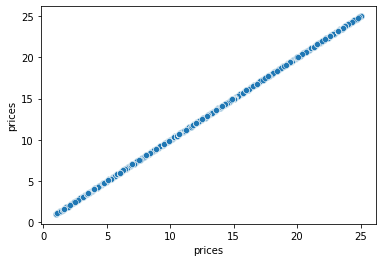

In [47]:
# Create scatterplot of order prices (to check consistency)

scatter = sns.scatterplot(x = 'prices', y = 'prices',data = df_complete)

In [16]:
# Create big and small (70/30) random subsets to use in line charts

np.random.seed(4)
dev = np.random.rand(len(df_complete)) <= 0.7

In [17]:
big = df_complete[dev]
small = df_complete[~dev]

In [18]:
# Check combined lengths (should = 32404859 length of df_complete)

len(big) + len (small)

32404859

In [19]:
# Define a smaller dataframe from small with two columns for line chart mapping order dow against prices

df_2 = small[['order_day_of_week','prices']]

In [20]:
# Check shape

df_2.shape

(9721098, 2)

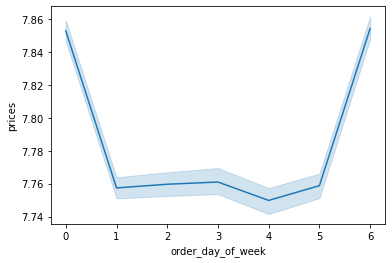

In [57]:
# Create line chart

line_prices = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

In [48]:
# Save visualizations to folder

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow.png'))

In [49]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [58]:
line_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))

## 03. Create descriptive visualizations for stakehoders

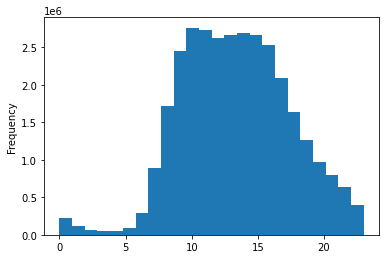

In [52]:
# Create a histogram of the “order_hour_of_day” column

hist_hour_of_day = df_complete['order_hour_of_day'].plot.hist(bins = 24)

Instacart sales increase rapidly over the course of the morning, maxing out around 11am. Order numbers stay high through the early and mid afternoon. They begin to decline starting around 5pm, dropping steeply through the evening and into the night. Sales reach their lowest point around 3am and stay low until 6-7 am, when they begin to rise again sharply. 

In [53]:
# Save

hist_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour_of_day.png'))

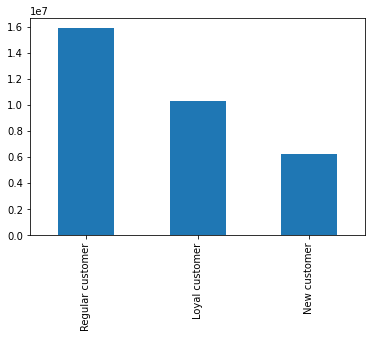

In [54]:
# Create a bar chart from the “loyalty_flag” column

bar_loyalty = df_complete['loyalty_flag'].value_counts().plot.bar()

As expected, the largest number of Instacart customers are 'Regular customers', meaning they have placed between 10 and 40 Instacart orders in their lifetime. Instacart does have significantly more 'Loyal customers', however, who have ordered more than 40 times, than it does 'New customers', who have ordered fewer than 10 times. This indicates a high level of customer retention and repeat business, and room for growth in attracting new customers. 

In [55]:
# Save

bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [32]:
# Define a new dataframe from small with columns to map order prices against the hour of the day.

df_3 = small[['order_hour_of_day','prices']]

In [28]:
# Check shape

df_3.shape

(9721098, 2)

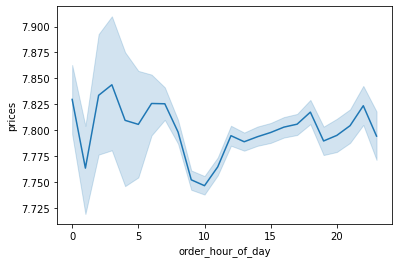

In [63]:
# Create line chart

line_hour_prices = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

Interestingly, the prices of customers' orders dip significantly in the late morning hours, just as the numbers of orders rise to their highest point. Order prices rise again quickly, however, in the early afternoon and keep rising slowly through dinnertime. There is another dip in prices during/after dinner, and another peak just before people go to bed. Prices vary more widely in the middle of the night, with large margins of error. All this would seem to indicate that customers consistently buy lower priced items when they are shopping for staples in the middle of the day. They also consistently spend more money per order when they are shopping for a single night's dinner, but they are less consistent in their spending habits when making late night impulse buys.                  

In [64]:
# Save

line_hour_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_prices.png'))

## 04. Conduct expolatory demographic analysis

In [39]:
# Define a new dataframe from small with columns to map age against family situation.

df_4 = small[['age','num_of_dependants']]

In [40]:
# Check shape

df_4.shape

(9721098, 2)

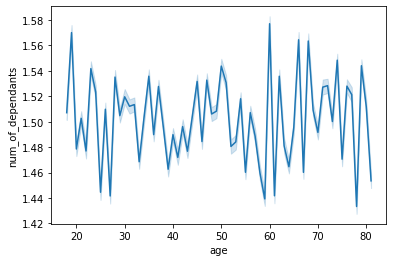

In [41]:
# Create line chart

line = sns.lineplot(data = df_4, x = 'age',y = 'num_of_dependants')

There is no clear negative or positive correlation between age and number of dependants overall. There are smaller variations, however, in the number of dependants among people between 30 and 55, which hover closer to an average of about 1.48.

In [60]:
# Save

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

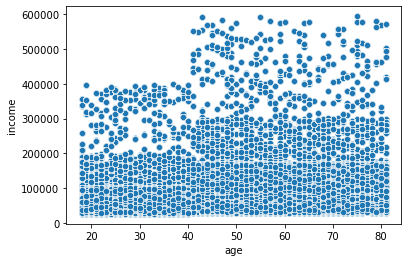

In [61]:
# Create scatterplot mapping age against income 

scatter_income = sns.scatterplot(x = 'age', y = 'income',data = df_complete)

Though this scatterplot does not produce a clear trend line, given the density of incomes under 20,000 across age levels, it does show a marked increase in income among people over 40. 

In [62]:
# Save

scatter_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_income.png'))